In [1]:
import pathlib
import numpy as np
import pandas as pd
import altair as alt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

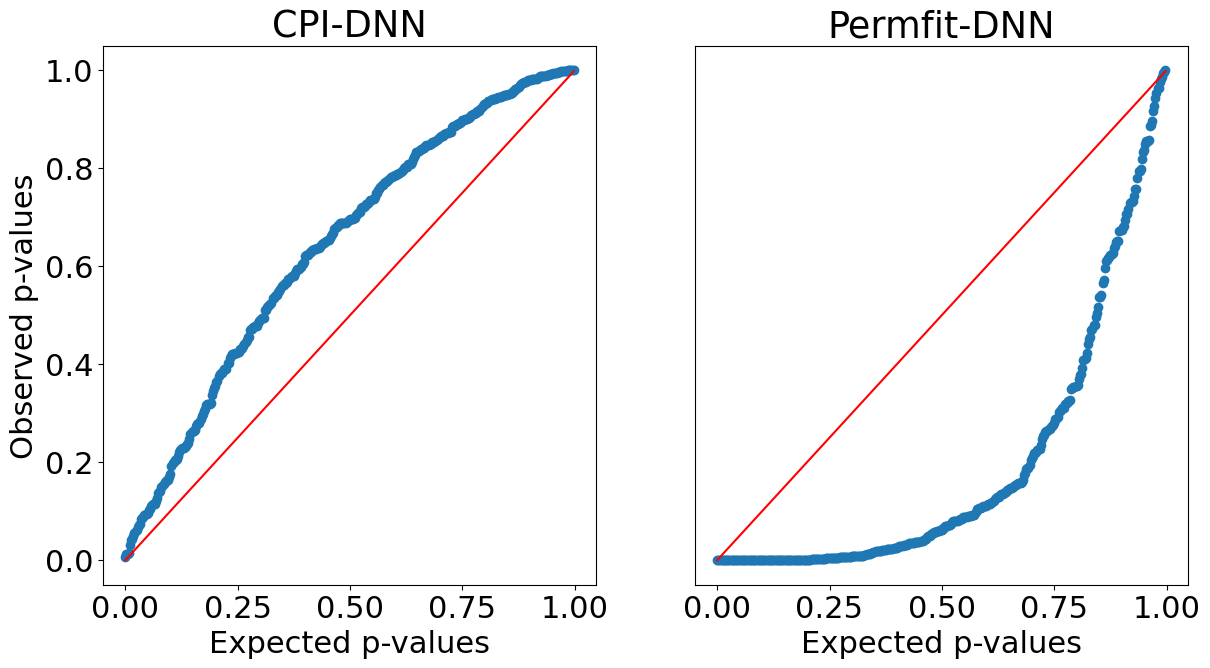

In [2]:
res_path = pathlib.Path('../results/results_csv')
df = pd.read_csv(res_path / "simulation_results_blocks_100_n_1000_p_50_permfit_cpi_iter_400.csv")
list_non_sign = [f'G{i+1}' for i in range(25, 26)]
df_cpi = df[(df['method'] == 'CPI-DNN') & (df['prob_data']=='regression_combine')]
df_cpi['variable']= np.array(np.tile([f'G{i+1}' for i in range(50)], 400))
df_cpi = df_cpi[df_cpi['variable'].isin(list_non_sign)][['variable', 'p_value', 'importance', 'iteration']]

df_permfit = df[(df['method'] == 'Permfit-DNN') & (df['prob_data']=='regression_combine')]
df_permfit['variable']= np.array(np.tile([f'G{i+1}' for i in range(50)], 400))
df_permfit = df_permfit[df_permfit['variable'].isin(list_non_sign)][['variable', 'p_value', 'importance', 'iteration']]

sample_data_permfit = np.array(df_permfit.groupby(['iteration'])['p_value'].mean())
sample_data_cpi = np.array(df_cpi.groupby(['iteration'])['p_value'].mean())

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (14,7)
plt.title('A')
plt.subplot(1, 2, 1)
ordered_pvals_cpi = np.sort(sample_data_cpi)
expected_pvals_cpi = np.arange(0, 1, 1/len(sample_data_cpi))

plt.scatter(expected_pvals_cpi, ordered_pvals_cpi)
plt.plot(expected_pvals_cpi, expected_pvals_cpi, color='r')
plt.title('CPI-DNN')
plt.xlabel("Expected p-values")
plt.ylabel("Observed p-values")

plt.subplot(1, 2, 2)
ordered_pvals_permfit = np.sort(sample_data_permfit)
expected_pvals_permfit = np.arange(0, 1, 1/len(sample_data_permfit))

plt.scatter(expected_pvals_permfit, ordered_pvals_permfit)
plt.plot(expected_pvals_permfit, expected_pvals_permfit, color='r')
plt.title('Permfit-DNN')
plt.xlabel("Expected p-values")
plt.yticks([])
# plt.savefig("p_vals_nonSign.pdf")
# plt.savefig("p_vals_nonSign.png", dpi=300)
plt.show()

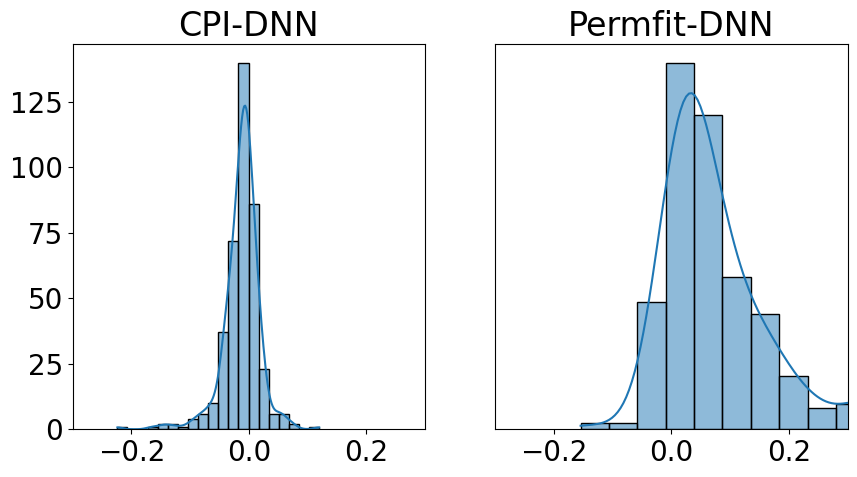

In [3]:
res_path = pathlib.Path('../results/results_csv')
df = pd.read_csv(res_path / "simulation_results_blocks_100_n_1000_p_50_permfit_cpi_iter_400.csv")
list_non_sign = [f'G{i+1}' for i in range(25, 26)]
df_cpi = df[(df['method'] == 'CPI-DNN') & (df['prob_data']=='regression_combine')]
df_cpi['variable']= np.array(np.tile([f'G{i+1}' for i in range(50)], 400))
df_cpi = df_cpi[df_cpi['variable'].isin(list_non_sign)]

df_permfit = df[(df['method'] == 'Permfit-DNN') & (df['prob_data']=='regression_combine')]
df_permfit['variable']= np.array(np.tile([f'G{i+1}' for i in range(50)], 400))
df_permfit = df_permfit[df_permfit['variable'].isin(list_non_sign)]

sample_data_permfit = np.array(df_permfit.groupby(['iteration'])['importance'].mean())
sample_data_cpi = np.array(df_cpi.groupby(['iteration'])['importance'].mean())

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (10,5)
plt.title('A')
plt.subplot(1, 2, 1)

# stats.probplot(sample_data_cpi, dist="norm", plot=plt)
# plt.hist(sample_data_cpi)
sns.histplot(sample_data_cpi, kde=True, bins=20)
plt.title('CPI-DNN')
plt.xlim(-0.3, 0.3)
plt.ylabel('')
# plt.ylim(-0.2, 0.4)
plt.subplot(1, 2, 2)
# stats.probplot(sample_data_permfit, dist="norm", plot=plt)
# plt.hist(sample_data_permfit)
sns.histplot(sample_data_permfit, kde=True, bins=20)
plt.ylabel('')
plt.title('Permfit-DNN')
# plt.ylim(-0.2, 0.4)
plt.xlim(-0.3, 0.3)
plt.yticks([])
# plt.suptitle('Importance score distribution for one non-significant variable')
# plt.savefig("Imp_nonSign.pdf")
# plt.savefig("Imp_nonSign.png", dpi=300)
plt.show()

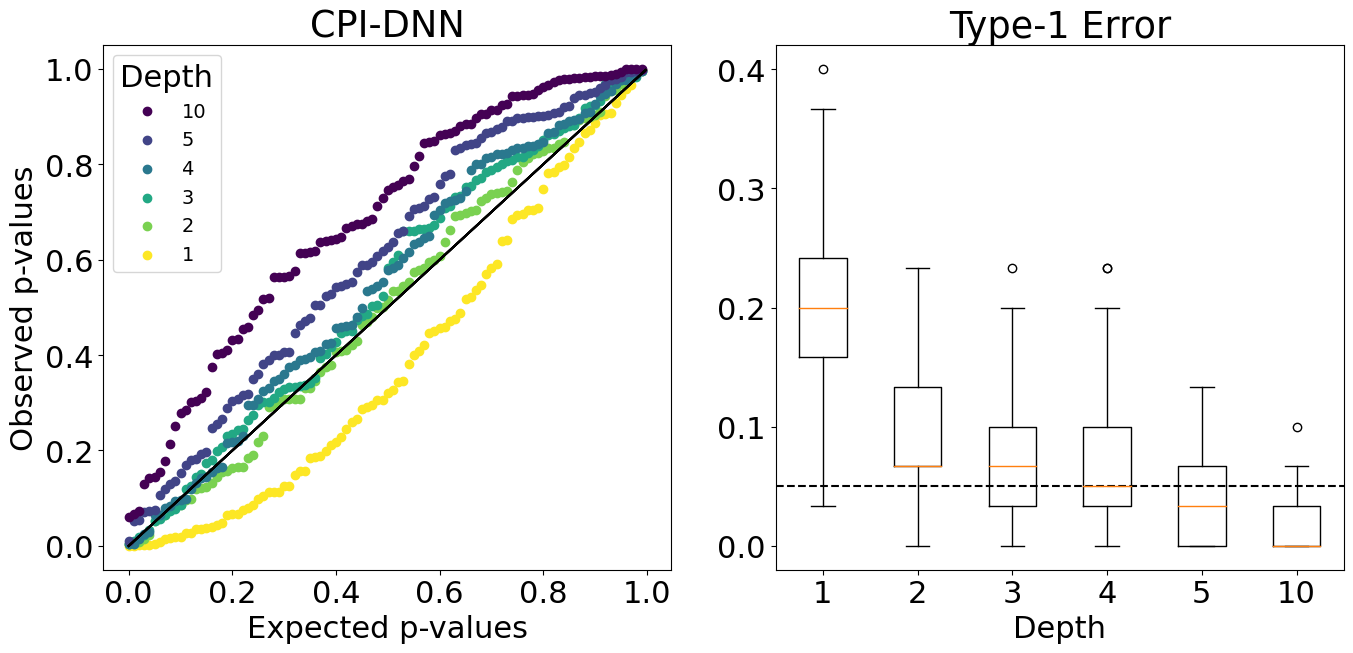

In [4]:
res_path = pathlib.Path('../results/results_csv')
list_df = []

for el in list(res_path.glob('*depth*.csv')):
    df = pd.read_csv(el)
    df['depth'] = str(el).split('depth_')[-1].split('.')[0]
    df['variable']= np.array(np.tile([f'G{i+1}' for i in range(50)], 100))
    list_df.append(df)
df = pd.concat(list_df, axis=0)

list_non_sign = [f'G{i+1}' for i in range(25, 26)]
df_calb = df[df['variable'].isin(list_non_sign)]

df_calb = df_calb.groupby(['depth', 'iteration'])['p_value'].mean()

color_map = plt.cm.viridis(np.linspace(0, 1, 6))[::-1]
plt.rcParams.update({'font.size': 22})
plt.subplot(1, 2, 1)
for dep_ind, depth in enumerate([1, 2, 3, 4, 5, 10]):
    df_curr = df_calb.loc[str(depth)]
    ordered_pvals = np.sort(df_curr)
    expected_pvals = np.arange(0, 1, 1/len(ordered_pvals))
    plt.scatter(expected_pvals, ordered_pvals, label=f"{depth}", color=color_map[dep_ind])
    plt.plot(expected_pvals_cpi, expected_pvals_cpi, color='black')
plt.xlabel("Expected p-values")
plt.ylabel("Observed p-values")
plt.title('CPI-DNN')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5, 4, 3, 2, 1, 0]
plt.legend(handles=[handles[i] for i in order], labels=[labels[i] for i in order], fontsize=14, title="Depth")

# Compute Type-error
list_non_sign = [f'G{i+1}' for i in range(20, 50)]
df = df[df['variable'].isin(list_non_sign)]
df['p_value'] = df['p_value'] < 0.05
df = df[['iteration', 'p_value', 'depth', 'variable']]
df = df.groupby(['depth', 'iteration'])['p_value'].mean()

data = []
plt.subplot(1, 2, 2)
for depth in [1, 2, 3, 4, 5, 10]:
    df_curr = df.loc[str(depth)]
    data.append(np.array(df_curr))
plt.axhline(0.05, color='black', linestyle='dashed')
plt.boxplot(data)
plt.xlabel('Depth')
plt.title("Type-1 Error")
plt.xticks(ticks=np.arange(1, 7), labels=[1, 2, 3, 4, 5, 10])

fig = plt.gcf()
fig.set_size_inches(14,7)
fig.tight_layout()
# plt.savefig("p_vals_Depth_nonSign.png", dpi=300)
plt.show()

# UKBB-based Exps

In [5]:
def ymin(x):    return np.quantile(x, 0.25)
def ymax(x):    return np.quantile(x, 0.75)
res_path = pathlib.Path('../results/results_csv')

In [6]:
df_auc = pd.read_csv(res_path / 'AUC_blocks_100_UKBB_single.csv')
df_t1_error = pd.read_csv(res_path / 'type1error_blocks_100_UKBB_single.csv')
df_power = pd.read_csv(res_path / 'power_blocks_100_UKBB_single.csv')
df_time = pd.read_csv(res_path / 'time_bars_blocks_100_UKBB_single.csv')

# AUC
df_auc_agg = df_auc.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Type-I error
df_t1_error_agg = df_t1_error.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Power
df_power_agg = df_power.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

In [7]:
# Large scale example

df_auc_large = pd.read_csv(res_path / 'AUC_blocks_100_n_10000_p_50_cpi_permfit.csv')
df_t1_error_large = pd.read_csv(res_path / 'type1error_blocks_100_n_10000_p_50_cpi_permfit.csv')
df_power_large = pd.read_csv(res_path / 'power_blocks_100_n_10000_p_50_cpi_permfit.csv')
df_time_large = pd.read_csv(res_path / 'time_bars_blocks_100_n_10000_p_50_cpi_permfit.csv')

# AUC
df_auc_large_agg = df_auc_large.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Type-I error
df_t1_error_large_agg = df_t1_error_large.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Power
df_power_large_agg = df_power_large.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

In [8]:
def plot_auc(data, offset=None, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0

    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('method:N',
                title=None,),
        x=alt.X('mean:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title=None,
                scale=alt.Scale(domain=(0.4, 1.0))),
        color=alt.Color('method:N',
                        title='Method'),
    ).properties(
        title='AUC score',
        height=height,
        width=width
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        size=err_size, opacity=1
    ).encode(
        y=alt.Y('method:N',
                title=None,),
        x=alt.X('ymin:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title='AUC',
                scale=alt.Scale(domain=(0.4, 1.0))),
        x2=alt.X2('ymax:Q', title='AUC'),
        color=alt.Color('method:N', title='Method'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )


    rule2 = alt.Chart(pd.DataFrame({
      'V1': [0.5],
      'Problem Data': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color='black').encode(
      x='V1:Q'
    )

    fig_auc_1_all = (error_a + points_a + rule2)
    return fig_auc_1_all

# Type-I Error
def plot_typeI(data, offset=False, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_c = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('method:N',
            title=None, axis=alt.Axis(labels=last, title=None)),
        x=alt.X('mean:Q', 
                title=None,scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('method:N', title='Method'),
    ).properties(
        title='Type-I error',
        height=height,
        width=width
    )

    error_c = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('method:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize),),
        x=alt.X('ymin:Q',
                title='Type-I error',
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q',
                  title='Type-I error'),
        color=alt.Color('method:N', title='Method'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    rule1= alt.Chart(pd.DataFrame({
      'V1': [0.05],
      'correlation_group': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color='black', strokeDash=[5, 5]).encode(
      x='V1:Q',
      color = alt.value('black')
    )

    fig_t1_all = (error_c + points_c + rule1)
    return fig_t1_all
# Power
def plot_power(data, offset=False, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('method:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize, title=None)
               ),
        x=alt.X('mean:Q', 
                title=None,
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('method:N', title='Method'),
    ).properties(
        title='Power',
        height=height,
        width=width
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('method:N',
                title=None,),
        x=alt.X('ymin:Q',
                title='Type-I error',
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q', title='Type-I error'),
        color=alt.Color('method:N', title='Method'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    fig_power_all = (error_a + points_a)
    return fig_power_all

def plot_time(data, last):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    time_bars = alt.Chart(
        data
    ).mark_bar(
    ).encode(
        x=alt.Y('V1:Q',
                scale=alt.Scale(type="log"),
                title=None),
        y=alt.X('method:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize, title=None)
               ),
        color=alt.Color('method:N', title='Method'),
    ).properties(
        title='Time (seconds)',
        height=height,
        width=width
    )
    return time_bars

In [9]:
marker_size = 200
err_size = 2
height = 120
width= 200
scheme = 'tableau10'
p1 = plot_auc(df_auc_agg, last=True)
p2 = plot_typeI(df_t1_error_agg, last=False)
p3 = plot_power(df_power_agg, last=False)
p4 = plot_time(df_time, last=False)

my_font = 'Helvetica'
fig2 = alt.hconcat(
    p1,
    p2,
    p3,
    p4
).configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=24,
    titleFontSize=28,
    labelSeparation=10,
    labelLimit=0
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=28,
    labelFontSize=24
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=20
).configure_legend(
    titleFontSize=24,
    labelFontSize=28,
    orient ='top',
#     columns=3,
    labelLimit=0,
    titleLimit=0
)

# fig2.save('figure_UKBB.svg')
# fig2.save('figure_UKBB.png', scale_factor=3)
fig2

alt.HConcatChart(...)

In [10]:
marker_size = 200
err_size = 2
height = 120
width= 200
scheme = 'tableau10'
p1 = plot_auc(df_auc_large_agg, last=True)
p2 = plot_typeI(df_t1_error_large_agg, last=False)
p3 = plot_power(df_power_large_agg, last=False)
p4 = plot_time(df_time_large, last=False)

my_font = 'Helvetica'
fig2 = alt.hconcat(
    p1,
    p2,
    p3,
    p4
).configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=24,
    titleFontSize=28,
    labelSeparation=10,
    labelLimit=0
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=28,
    labelFontSize=24
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=28
).configure_legend(
    titleFontSize=28,
    labelFontSize=24,
    orient ='top',
#     columns=3,
    labelLimit=0,
    titleLimit=0
)

# fig2.save('figure_large.svg')
# fig2.save('figure_large.png', scale_factor=3)
fig2

alt.HConcatChart(...)

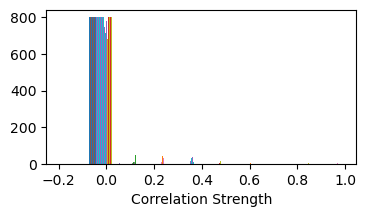

In [11]:
import pickle
with open(res_path / "UKBB_corr.pickle", "rb") as file:
    ukbb_cor = pickle.load(file)
plt.rcParams["figure.figsize"] = (4, 2)
plt.rcParams.update({'font.size': 10})
plt.hist(np.triu(ukbb_cor))
plt.xlabel("Correlation Strength")
# plt.title("Correlation distribution in UKBB")
# plt.savefig('ukbb_corr.pdf')
# plt.savefig('ukbb_corr.png', dpi=300)
plt.show()

# CPI vs LOCO

In [12]:
def ymin(x):    return np.quantile(x, 0.25)
def ymax(x):    return np.quantile(x, 0.75)
res_path = pathlib.Path('../results/results_csv')

In [13]:
df_auc_dnn = pd.read_csv(res_path / 'AUC_blocks_100_CPI_LOCO_DNN.csv')
df_t1_error_dnn = pd.read_csv(res_path / 'type1error_blocks_100_CPI_LOCO_DNN.csv')
df_power_dnn = pd.read_csv(res_path / 'power_blocks_100_CPI_LOCO_DNN.csv')
df_time_dnn = pd.read_csv(res_path / 'time_bars_blocks_100_CPI_LOCO_DNN.csv')

# AUC
df_auc_dnn_agg = df_auc_dnn.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Type-I error
df_t1_error_dnn_agg = df_t1_error_dnn.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Power
df_power_dnn_agg = df_power_dnn.groupby(['method'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

In [14]:
marker_size = 200
err_size = 2
height = 120
width= 160
scheme = 'tableau10'
p1 = plot_auc(df_auc_dnn_agg, last=True)
p2 = plot_typeI(df_t1_error_dnn_agg, last=False)
p3 = plot_power(df_power_dnn_agg, last=False)
p4 = plot_time(df_time_dnn, last=False)

my_font = 'Helvetica'
fig_dnn = alt.hconcat(
    p1,
    p2,
    p3,
    p4
).configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=20,
    titleFontSize=24,
    labelSeparation=10
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=24,
    labelFontSize=20
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=24
).configure_legend(
    titleFontSize=24,
    labelFontSize=20,
    orient ='top',
#     columns=3,
    labelLimit=0,
    titleLimit=0,
#     columnPadding=45
)

# fig_dnn.save('figure_cpi_loco.svg')
# fig_dnn.save('figure_cpi_loco.png', scale_factor=3)
fig_dnn

alt.HConcatChart(...)